Imports and setup

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from statistics import mean
import math

random.seed(1984)

Generating 100 node graphs

In [4]:
degrees = [random.randint(40,60) for i in range(100)]
print(nx.is_graphical(degrees))

True


In [5]:
unbalanced_graph = nx.random_degree_sequence_graph(degrees,seed=1984)
avg_degree = math.floor(mean(degrees))
print('Average degree of unbalanced graph:', avg_degree)
balanced_graph = nx.random_degree_sequence_graph([avg_degree for i in range(100)],seed=1984)

Average degree of unbalanced graph: 51


Testing 50 node graphs

In [8]:
degrees1 = [random.randint(2,20) for i in range(50)]
print(nx.is_graphical(degrees1))
unbalanced_graph1 = nx.random_degree_sequence_graph(degrees1,seed=1984)
avg_degree1 = math.floor(mean(degrees1))
print('Average degree of unbalanced graph:', avg_degree1)
balanced_graph1 = nx.random_degree_sequence_graph([avg_degree1 for i in range(50)],seed=1984)

True
Average degree of unbalanced graph: 9


Drawing graphs

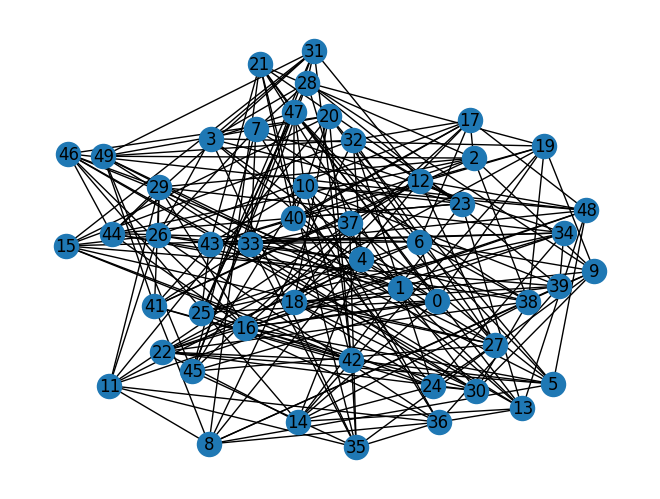

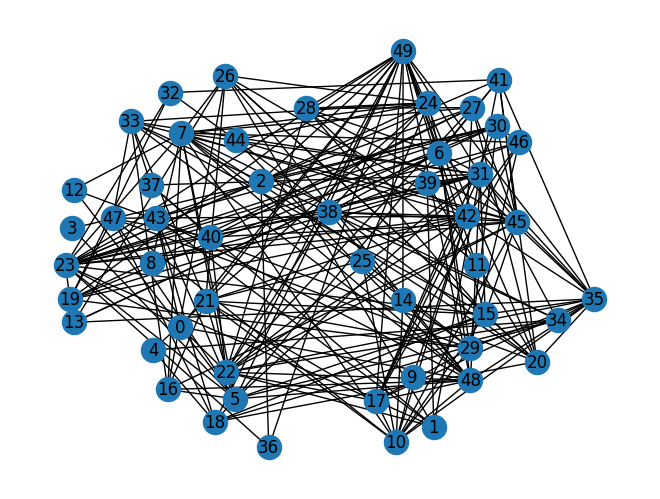

In [9]:
plt.figure()
nx.draw(balanced_graph1, with_labels=True, pos=nx.spring_layout(balanced_graph, k=0.9, iterations=50))
plt.show()

plt.figure()
nx.draw(unbalanced_graph1, with_labels=True, pos=nx.spring_layout(balanced_graph, k=0.9, iterations=50))
plt.show()

Breadth first search 

In [10]:
from collections import deque

def bfs_path(graph, start, end):
    G = graph
    goal = end
    queue = [(start, [start])]
    while queue:
        (node, path) = queue.pop(0)
        for next_node in G[node]:
            if next_node not in path:
                if next_node == goal:
                    return path + [next_node]
                else:
                    queue.append((next_node, path + [next_node]))

Depth first search

In [11]:
def dfs_path(graph, start, end, visited=None):
    G = graph
    goal = end
    stack = [(start, [start])]
    while stack:
        (node, path) = stack.pop()
        for next_node in G[node]:
            if next_node not in path:
                if next_node == goal:
                    return path + [next_node]
                else:
                    stack.append((next_node, path + [next_node]))

Testing time of execution

In [53]:
from functools import reduce

# Measure the time taken by BFS and DFS algorithms for a given graph
def measure_time(graph, algorithm, strt, end):
    start_time = time.time()
    algorithm(graph, strt, end)
    end_time = time.time()
    return end_time - start_time

# Generate graphs and measure the time taken by BFS and DFS algorithms
nodes = {1:{"start": 0, "end": 25}, 
         2:{"start": 10, "end": 35}, 
         3:{"start": 19, "end": 49},
         4:{"start": 6, "end": 37},
         5:{"start": 49, "end": 18},
         6:{"start": 7, "end": 34},
         7:{"start": 36, "end": 1},
         8:{"start": 12, "end": 42},
         9:{"start": 43, "end": 8},
         10:{"start": 11, "end": 46}
}

bfs_times_balanced = reduce(lambda x, y: x+y, [measure_time(balanced_graph1, bfs_path, nodes[i]["start"], nodes[i]["end"]) for i in nodes.keys()])
dfs_times_balanced = reduce(lambda x, y: x+y, [measure_time(balanced_graph1, dfs_path, nodes[i]["start"], nodes[i]["end"]) for i in nodes.keys()])
bfs_times_unbalanced = reduce(lambda x, y: x+y, [measure_time(unbalanced_graph1, bfs_path, nodes[i]["start"], nodes[i]["end"]) for i in nodes.keys()])
dfs_times_unbalanced = reduce(lambda x, y: x+y, [measure_time(unbalanced_graph1, dfs_path, nodes[i]["start"], nodes[i]["end"]) for i in nodes.keys()])


In [77]:
print(bfs_times_balanced, bfs_times_unbalanced)
print(dfs_times_balanced, dfs_times_unbalanced)

0.0009915828704833984 0.0019860267639160156
0.0009989738464355469 0.0009970664978027344


In [75]:
df = pd.DataFrame({
    "Graph": ["Balanced", "Unbalanced"],
    "BFS Time": [bfs_times_balanced,bfs_times_unbalanced],
    "DFS Time": [dfs_times_balanced,dfs_times_unbalanced]
})
print(df)

        Graph  BFS Time  DFS Time
0    Balanced  0.000992  0.000999
1  Unbalanced  0.001986  0.000997


Visualising results

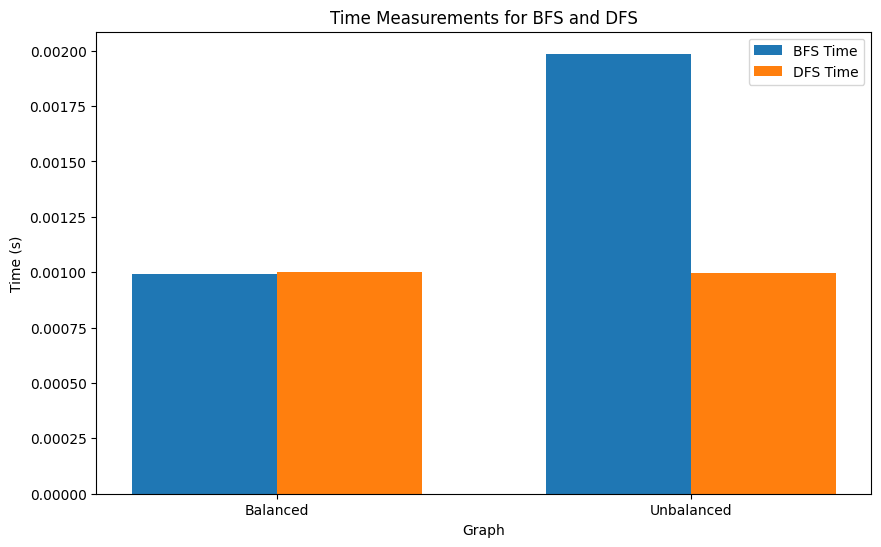

In [78]:

import numpy as np
plt.figure(figsize=(10, 6))

# Set the x-axis values
x = np.arange(len(df))

# Set the width of each bar
bar_width = 0.35

# Plot the bar graphs
plt.bar(x, df["BFS Time"], width=bar_width, label="BFS Time")
plt.bar(x + bar_width, df["DFS Time"], width=bar_width, label="DFS Time")

# Set the x-axis tick labels
plt.xticks(x + bar_width/2, df["Graph"])

# Set the labels and title
plt.xlabel("Graph")
plt.ylabel("Time (s)")
plt.title("Time Measurements for BFS and DFS")
plt.legend()

# Display the plot
plt.show()
